# Análisis de Mecanismo de 4 barras

Sacado de [Wikipedia](https://es.wikipedia.org/wiki/Mecanismo_de_cuatro_barras#:~:text=En%20ingenier%C3%ADa%20mec%C3%A1nica%20un%20mecanismo,a%20la%20fija%20mediante%20pivotes.)

En cualquier cuadrilátero tenemos que:
$\vec{l}_1+\vec{l}_2+\vec{l}_3+\vec{l}_4 = \oslash$

Como se conocen los águlos de las barras 1 y 2, podemos hacer este cambio de variable:
$$A=l_1cos(\theta_1)+l_2cos(\theta_2)$$
$$B=l_1sin(\theta_1)+l_2sin(\theta_2)$$

Para sacar el tercer ángulo realizamos el siguiente cambio de variable:
$$C=\frac{l_4^2-l_3^2-A^2-B^2}{2l_3}$$
Para la $\theta_3$:
$$\theta_3=2arctg[\frac{B\pm\sqrt{A^2+B^2-C^2}}{C+A}]$$

De mismo modo, para el cuarto ángulo hacemos este cambio de vabiable:
$$D=\frac{l_3^2-l_4^2-A^2-B^2}{2l_4}$$
Finalmente:
$$\theta_4=2arctg[\frac{B\mp\sqrt{A^2+B^2-D^2}}{D+A}]$$

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

DEG_TO_RAD = (2*np.pi) / 360.0
RAD_TO_DEG = 360.0 / (2*np.pi)

In [2]:
def get_A_B(l1, l2, theta1, theta2):
	A = l1*np.cos(theta1) + l2*np.cos(theta2)
	B = l1*np.sin(theta1) + l2*np.sin(theta2)
	return A, B

def get_C_D(l3, l4, A, B):
	C = (l4**2 - l3**2 - A**2 - B**2) / (2*l3)
	D = (l3**2 - l4**2 - A**2 - B**2) / (2*l4)
	return C, D

def get_theta_3_4(A, B, C, D):
	theta3 = 2*np.arctan( (B-np.sqrt(A**2+B**2-C**2)) / (C+A) )
	theta4 = 2*np.arctan( (B+np.sqrt(A**2+B**2-D**2)) / (D+A) )
	return theta3, theta4

def get_abs_theta(l1, l2, l3, l4, theta2, theta1=0.0):
	a,      b      = get_A_B(l1, l2, theta1, theta2)
	c,      d      = get_C_D(l3, l4, a, b)
	theta3, theta4 = get_theta_3_4(a, b, c, d)
	return theta1, theta2, theta3, theta4

def get_internal_angles(l1, l2, l3, l4, theta2, theta1=0.0):
	_,_, theta3, theta4 = get_abs_theta(l1, l2, l3, l4, theta2, theta1)

	alpha1 = np.abs(np.pi - np.abs(theta2 - theta1))
	alpha2 = np.abs(np.pi - np.abs(theta3 - theta2))
	alpha3 = np.abs(np.pi - np.abs(theta4 - theta3))
	alpha4 = np.abs(np.pi - np.abs(theta1 - theta4))

	return alpha1, alpha2, alpha3, alpha4

def angle_vect(vec):
	return np.arctan2(vec[1], vec[0])

def to_vect(magnitude, angle):
	return np.array([
		magnitude*np.cos(angle),
		magnitude*np.sin(angle)
	])

Theta 1: -84.792°
Theta 2:-179.688°
Theta 3:  82.801°
Theta 4:  -1.888°

Alpha 1:  85.104°
Alpha 2:  82.489°
Alpha 3:  95.311°
Alpha 4:  97.097°


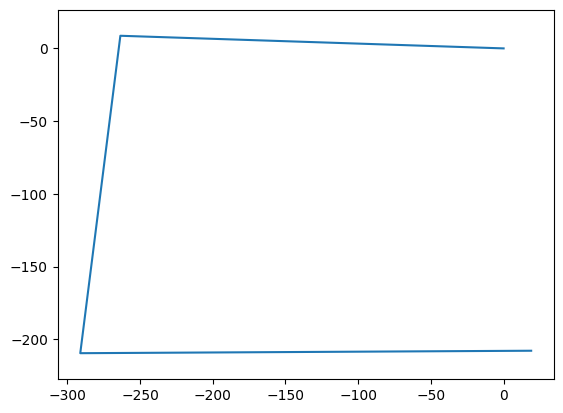

In [3]:
dist_to_A = np.array([-329.48,  216.58])
dist_to_B = np.array([-310.04,   -1.69])
dist_to_E = np.array([- 18.95,  207.89])

L1 = 208.75
L2 = 310.05
L3 = 220.00
L4 = 263.67

# theta1, theta2 = 0.0*DEG_TO_RAD, 135.0*DEG_TO_RAD
theta1 = angle_vect(-dist_to_E)#-np.deg2rad(-180.0)
theta2 = angle_vect(dist_to_B)

theta1, theta2, theta3, theta4 = get_abs_theta      (L1, L2, L3, L4, theta2, theta1)
alpha1, alpha2, alpha3, alpha4 = get_internal_angles(L1, L2, L3, L4, theta2, theta1)

print(f'Theta 1:{np.rad2deg(theta1):8.3f}°')
print(f'Theta 2:{np.rad2deg(theta2):8.3f}°')
print(f'Theta 3:{np.rad2deg(theta3):8.3f}°')
print(f'Theta 4:{np.rad2deg(theta4):8.3f}°')
print()
print(f'Alpha 1:{np.rad2deg(alpha1):8.3f}°')
print(f'Alpha 2:{np.rad2deg(alpha2):8.3f}°')
print(f'Alpha 3:{np.rad2deg(alpha3):8.3f}°')
print(f'Alpha 4:{np.rad2deg(alpha4):8.3f}°')

a =     to_vect(L1, theta1)
b = a + to_vect(L2, theta2)
c = b + to_vect(L3, theta3)
d = c + to_vect(L4, theta4)

bar_4 = np.array([a, b, c, d])

plt.axis('equal')
plt.plot(bar_4[:, 0], bar_4[:, 1])
plt.show()

In [4]:
theta1   = angle_vect(-dist_to_E)#-np.deg2rad(-180.0)
st_angle = angle_vect(dist_to_B)

RANGE   = np.deg2rad(5)
MAX_ANG = st_angle + RANGE
MIN_ANG = st_angle - RANGE
NSTEPS  = 50

theta2s = np.array([MIN_ANG+(MAX_ANG-MIN_ANG)*i/NSTEPS for i in range(NSTEPS)])
theta1s = np.array([theta1                             for i in range(NSTEPS)])

theta1, theta2, theta3, theta4 = get_abs_theta      (L1, L2, L3, L4, theta2s, theta1s)
alpha1, alpha2, alpha3, alpha4 = get_internal_angles(L1, L2, L3, L4, theta2s, theta1s)

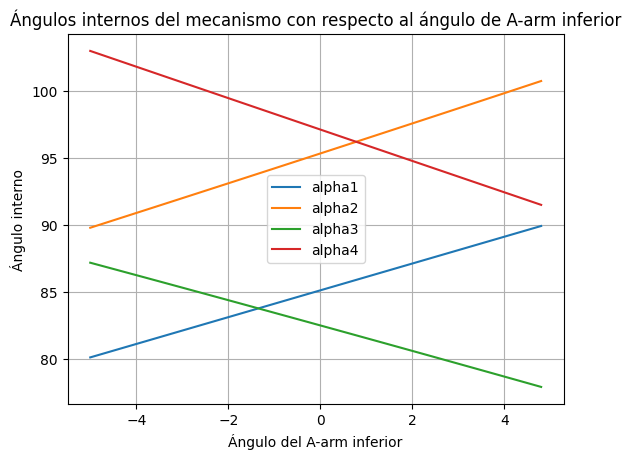

In [5]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

# plt.axis('equal')

plt.title('Ángulos internos del mecanismo con respecto al ángulo de A-arm inferior')
# plt.axis('equal')
plt.ylabel('Ángulo interno')
plt.xlabel('Ángulo del A-arm inferior')

plt.plot(np.rad2deg(theta2 - st_angle), np.rad2deg(alpha1))
plt.plot(np.rad2deg(theta2 - st_angle), np.rad2deg(alpha3))
plt.plot(np.rad2deg(theta2 - st_angle), np.rad2deg(alpha2))
plt.plot(np.rad2deg(theta2 - st_angle), np.rad2deg(alpha4))

plt.legend(['alpha1', 'alpha2', 'alpha3', 'alpha4'])
plt.grid(True)
plt.show()

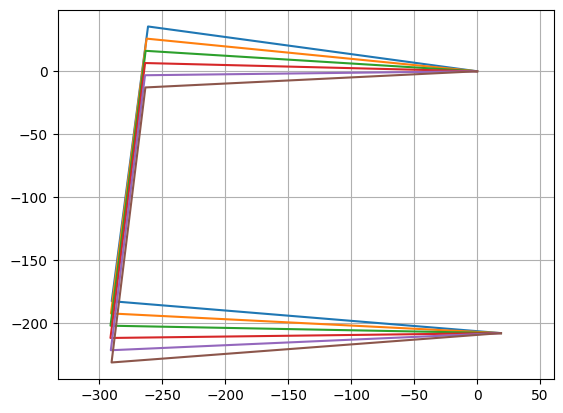

In [6]:
a =     to_vect(L1, theta1)
b = a + to_vect(L2, theta2)
c = b + to_vect(L3, theta3)
d = c + to_vect(L4, theta4)

bar_4 = np.array([a, b, c, d])
# print(bar_4[:,:,0].shape)

plt.axis('equal')
for nbar in range(0,bar_4.shape[2], 9):
	plt.plot(bar_4[:, 0, nbar], bar_4[:, 1, nbar])
plt.grid(True)
plt.show()

In [7]:
print(f'Valor en posición mínima de alpha 1:{np.rad2deg(alpha1[0]):8.3f}°')
print(f'Valor en posición mínima de alpha 2:{np.rad2deg(alpha2[0]):8.3f}°')
print(f'Valor en posición mínima de alpha 3:{np.rad2deg(alpha3[0]):8.3f}°')
print(f'Valor en posición mínima de alpha 4:{np.rad2deg(alpha4[0]):8.3f}°')
print()
print(f'Valor en posición máxima de alpha 1:{np.rad2deg(alpha1[-1]):8.3f}°')
print(f'Valor en posición máxima de alpha 2:{np.rad2deg(alpha2[-1]):8.3f}°')
print(f'Valor en posición máxima de alpha 3:{np.rad2deg(alpha3[-1]):8.3f}°')
print(f'Valor en posición máxima de alpha 4:{np.rad2deg(alpha4[-1]):8.3f}°')
print()
print(f'Mínimo de alpha 1:{np.rad2deg(np.min(alpha1)):8.3f}°')
print(f'Mínimo de alpha 2:{np.rad2deg(np.min(alpha2)):8.3f}°')
print(f'Mínimo de alpha 3:{np.rad2deg(np.min(alpha3)):8.3f}°')
print(f'Mínimo de alpha 4:{np.rad2deg(np.min(alpha4)):8.3f}°')
print()
print(f'Máximo de alpha 1:{np.rad2deg(np.max(alpha1)):8.3f}°')
print(f'Máximo de alpha 2:{np.rad2deg(np.max(alpha2)):8.3f}°')
print(f'Máximo de alpha 3:{np.rad2deg(np.max(alpha3)):8.3f}°')
print(f'Máximo de alpha 4:{np.rad2deg(np.max(alpha4)):8.3f}°')

Valor en posición mínima de alpha 1:  80.104°
Valor en posición mínima de alpha 2:  87.165°
Valor en posición mínima de alpha 3:  89.772°
Valor en posición mínima de alpha 4: 102.959°

Valor en posición máxima de alpha 1:  89.904°
Valor en posición máxima de alpha 2:  77.902°
Valor en posición máxima de alpha 3: 100.714°
Valor en posición máxima de alpha 4:  91.479°

Mínimo de alpha 1:  80.104°
Mínimo de alpha 2:  77.902°
Mínimo de alpha 3:  89.772°
Mínimo de alpha 4:  91.479°

Máximo de alpha 1:  89.904°
Máximo de alpha 2:  87.165°
Máximo de alpha 3: 100.714°
Máximo de alpha 4: 102.959°
